# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the file porter_data_1.csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Delivery_Starter/porter_data_1.csv")

In [4]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [5]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [6]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [8]:
# Convert categorical features to category type
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_columns] = df[categorical_columns].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [10]:
# Calculate time taken in minutes
df['time_taken_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [11]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day'].apply(lambda x: 1 if x > 4 else 0)

df.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_minutes  hour  day  \
0                      21.0     34.44                47.0    22    4   
1                       2.0     27.60                44.0    21    1   
2                      18.0     11.56                55.0     0    0   
3                       8.0     31.80                59.0     3    3   
4                       7.0      8.20                46.0     2    1   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

In [12]:
# Drop unnecessary columns
# since these are not helpful with our objective
cols_to_drop = [ 'min_item_price', 'max_item_price', 'created_at', 'actual_delivery_time']
df.drop(columns=cols_to_drop, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [13]:
# Define target variable (y) and features (X)
X = df.drop(columns=['time_taken_minutes'])
y = df['time_taken_minutes']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [14]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140621, 13)
(140621,)
(35156, 13)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [16]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance','total_items']
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'hour', 'day', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

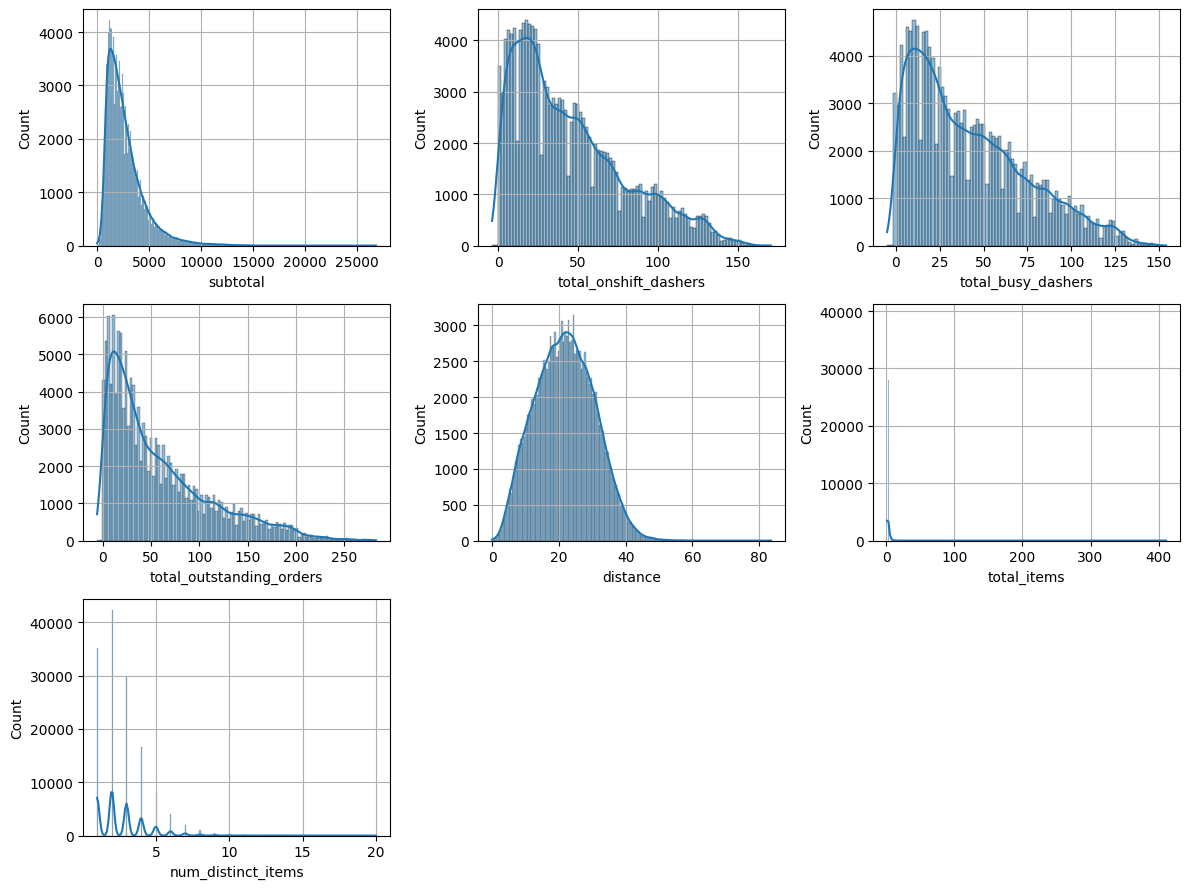

In [ ]:
# Plot distributions for all numerical columns
plt.figure(figsize=(12, 9))

plt.subplot(3,3,1)
sns.histplot(X_train["subtotal"], kde=True)
plt.tight_layout()
plt.grid(True)

plt.subplot(3,3,2)
sns.histplot(X_train["total_onshift_dashers"], kde=True)
plt.tight_layout()
plt.grid(True)

plt.subplot(3,3,3)
sns.histplot(X_train["total_busy_dashers"], kde=True)
plt.tight_layout()
plt.grid(True)

plt.subplot(3,3,4)
sns.histplot(X_train["total_outstanding_orders"], kde=True)
plt.tight_layout()
plt.grid(True)

plt.subplot(3,3,5)
sns.histplot(X_train["distance"], kde=True)
plt.tight_layout()
plt.grid(True)

plt.subplot(3,3,6)
sns.histplot(X_train["total_items"], kde=True)
plt.tight_layout()
plt.grid(True)

plt.subplot(3,3,7)
sns.histplot(X_train["num_distinct_items"], kde=True)
plt.tight_layout()
plt.grid(True)

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

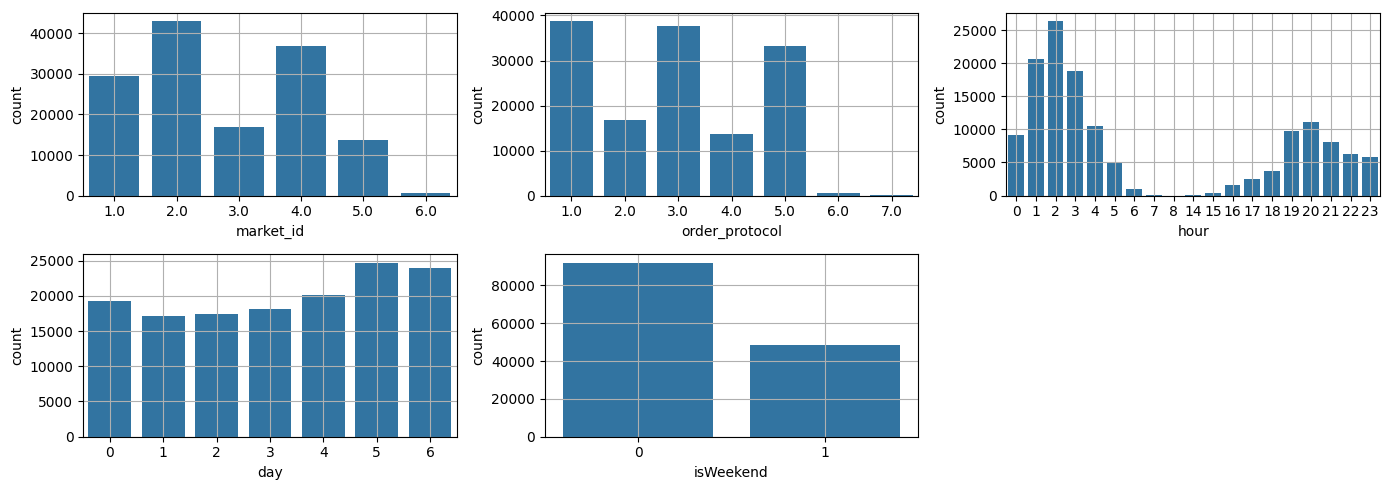

In [ ]:
# Distribution of categorical columns
plt.figure(figsize=(14, 5))

plt.subplot(2,3,1)
sns.countplot(x="market_id", data=X_train)
plt.tight_layout()
plt.grid(True)

plt.subplot(2,3,2)
sns.countplot(x="order_protocol", data=X_train)
plt.tight_layout()
plt.grid(True)

plt.subplot(2,3,3)
sns.countplot(x="hour", data=X_train)
plt.tight_layout()
plt.grid(True)

plt.subplot(2,3,4)
sns.countplot(x="day", data=X_train)
plt.tight_layout()
plt.grid(True)

plt.subplot(2,3,5)
sns.countplot(x="isWeekend", data=X_train)
plt.tight_layout()
plt.grid(True)



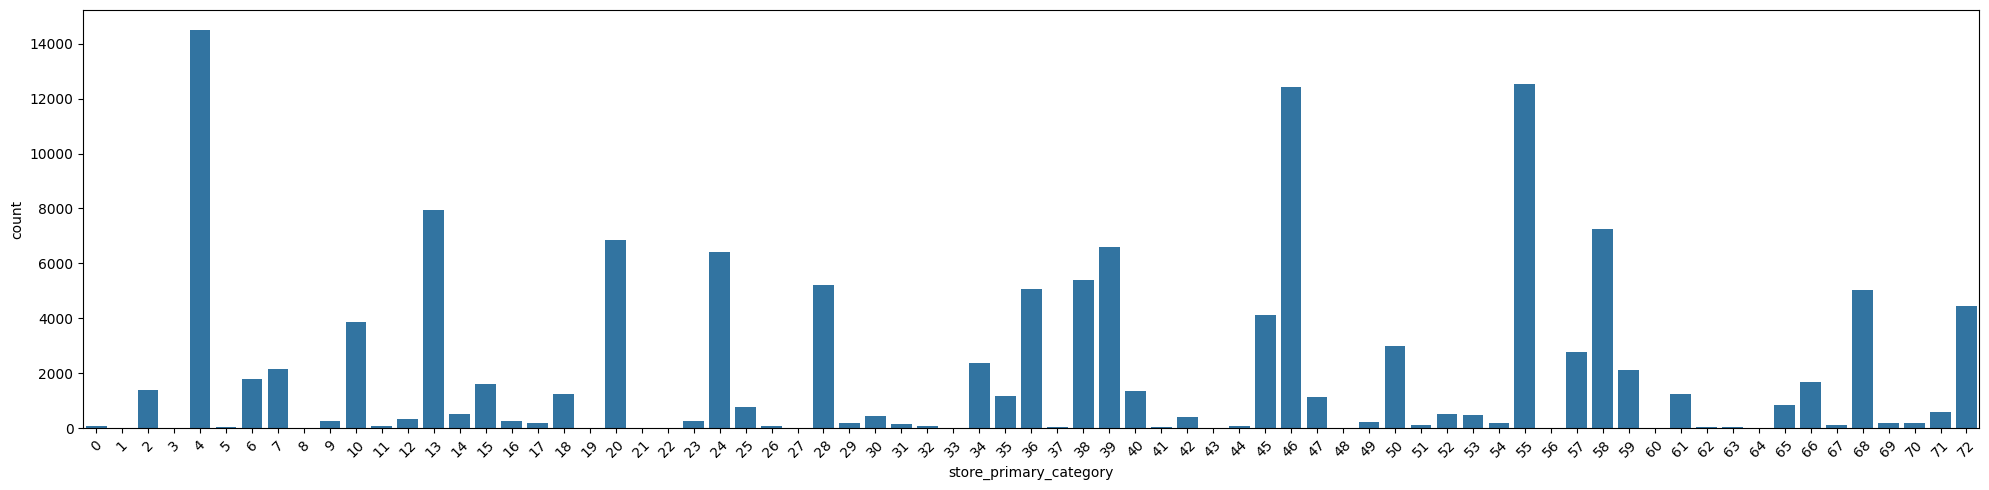

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x="store_primary_category", data=X_train)
plt.xticks(rotation=45)
plt.tight_layout()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

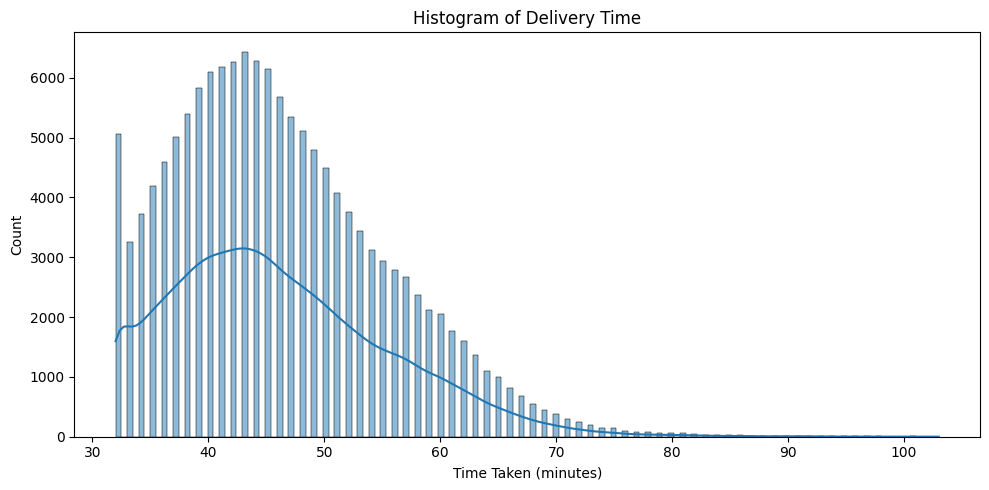

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True)
plt.title('Histogram of Delivery Time')
plt.xlabel('Time Taken (minutes)')
plt.tight_layout()

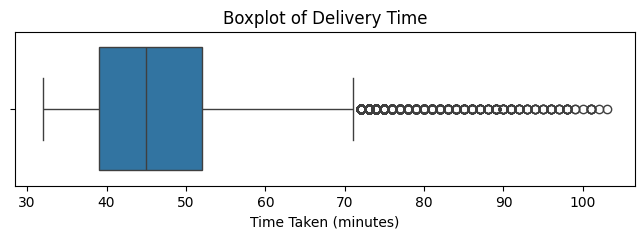

In [ ]:
plt.figure(figsize=(8,2))
sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Time')
plt.xlabel('Time Taken (minutes)')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

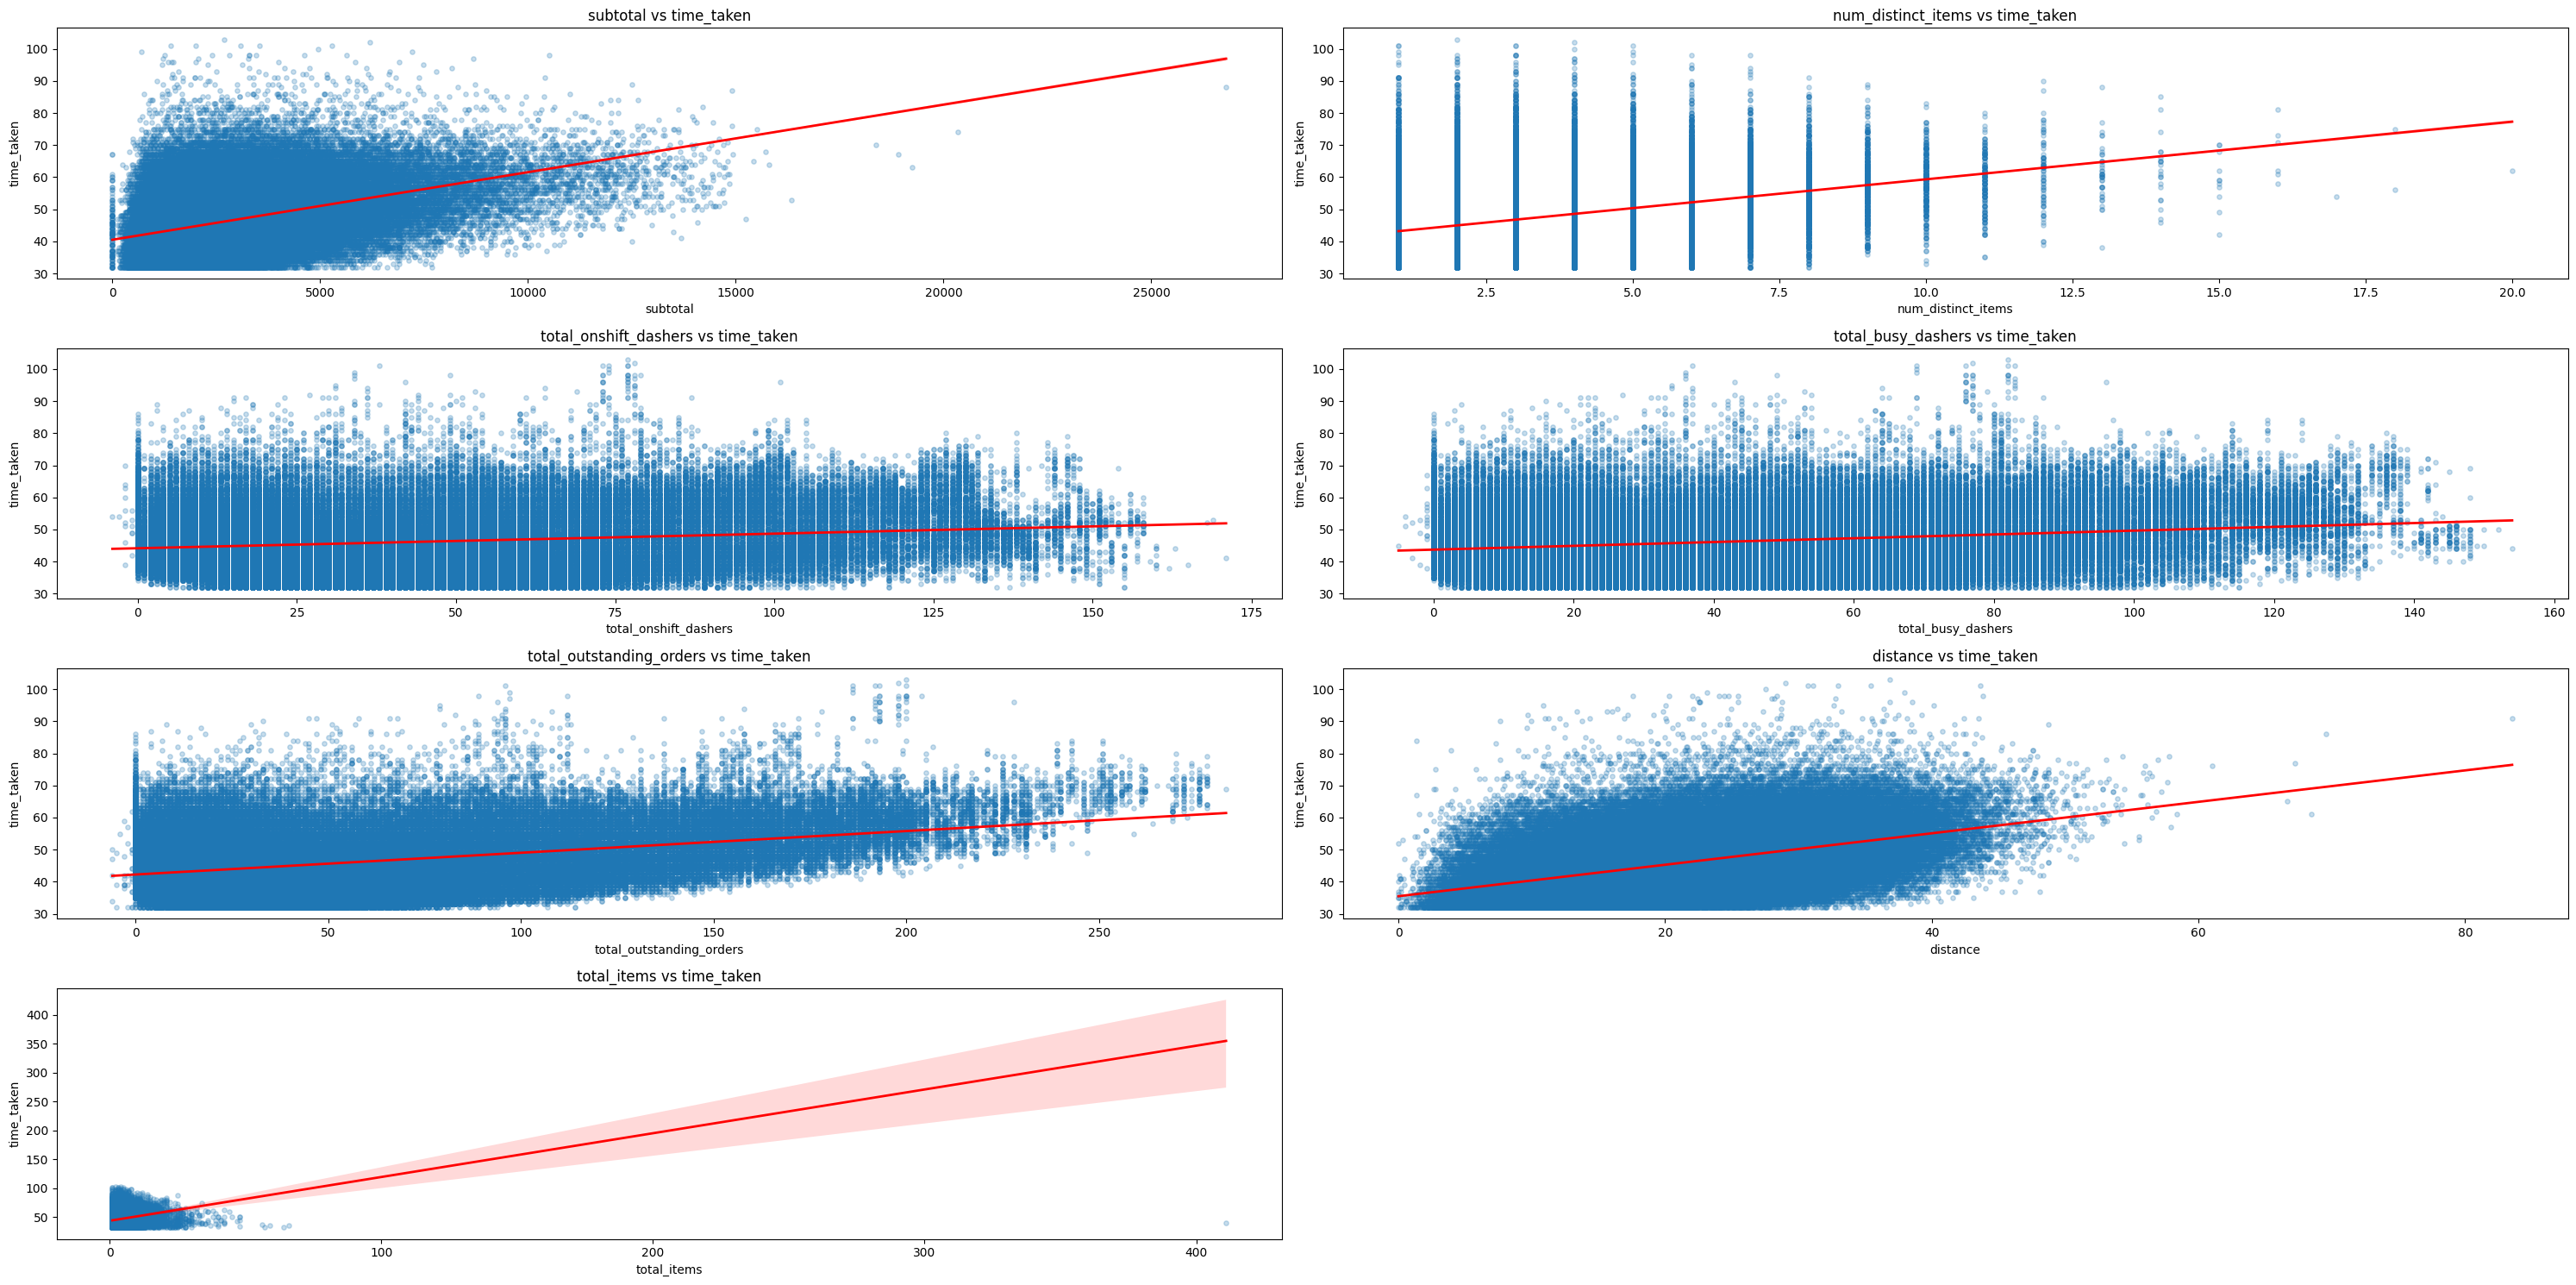

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize = (30,15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4,2,i)
    sns.regplot(x = X_train[col], y = y_train, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

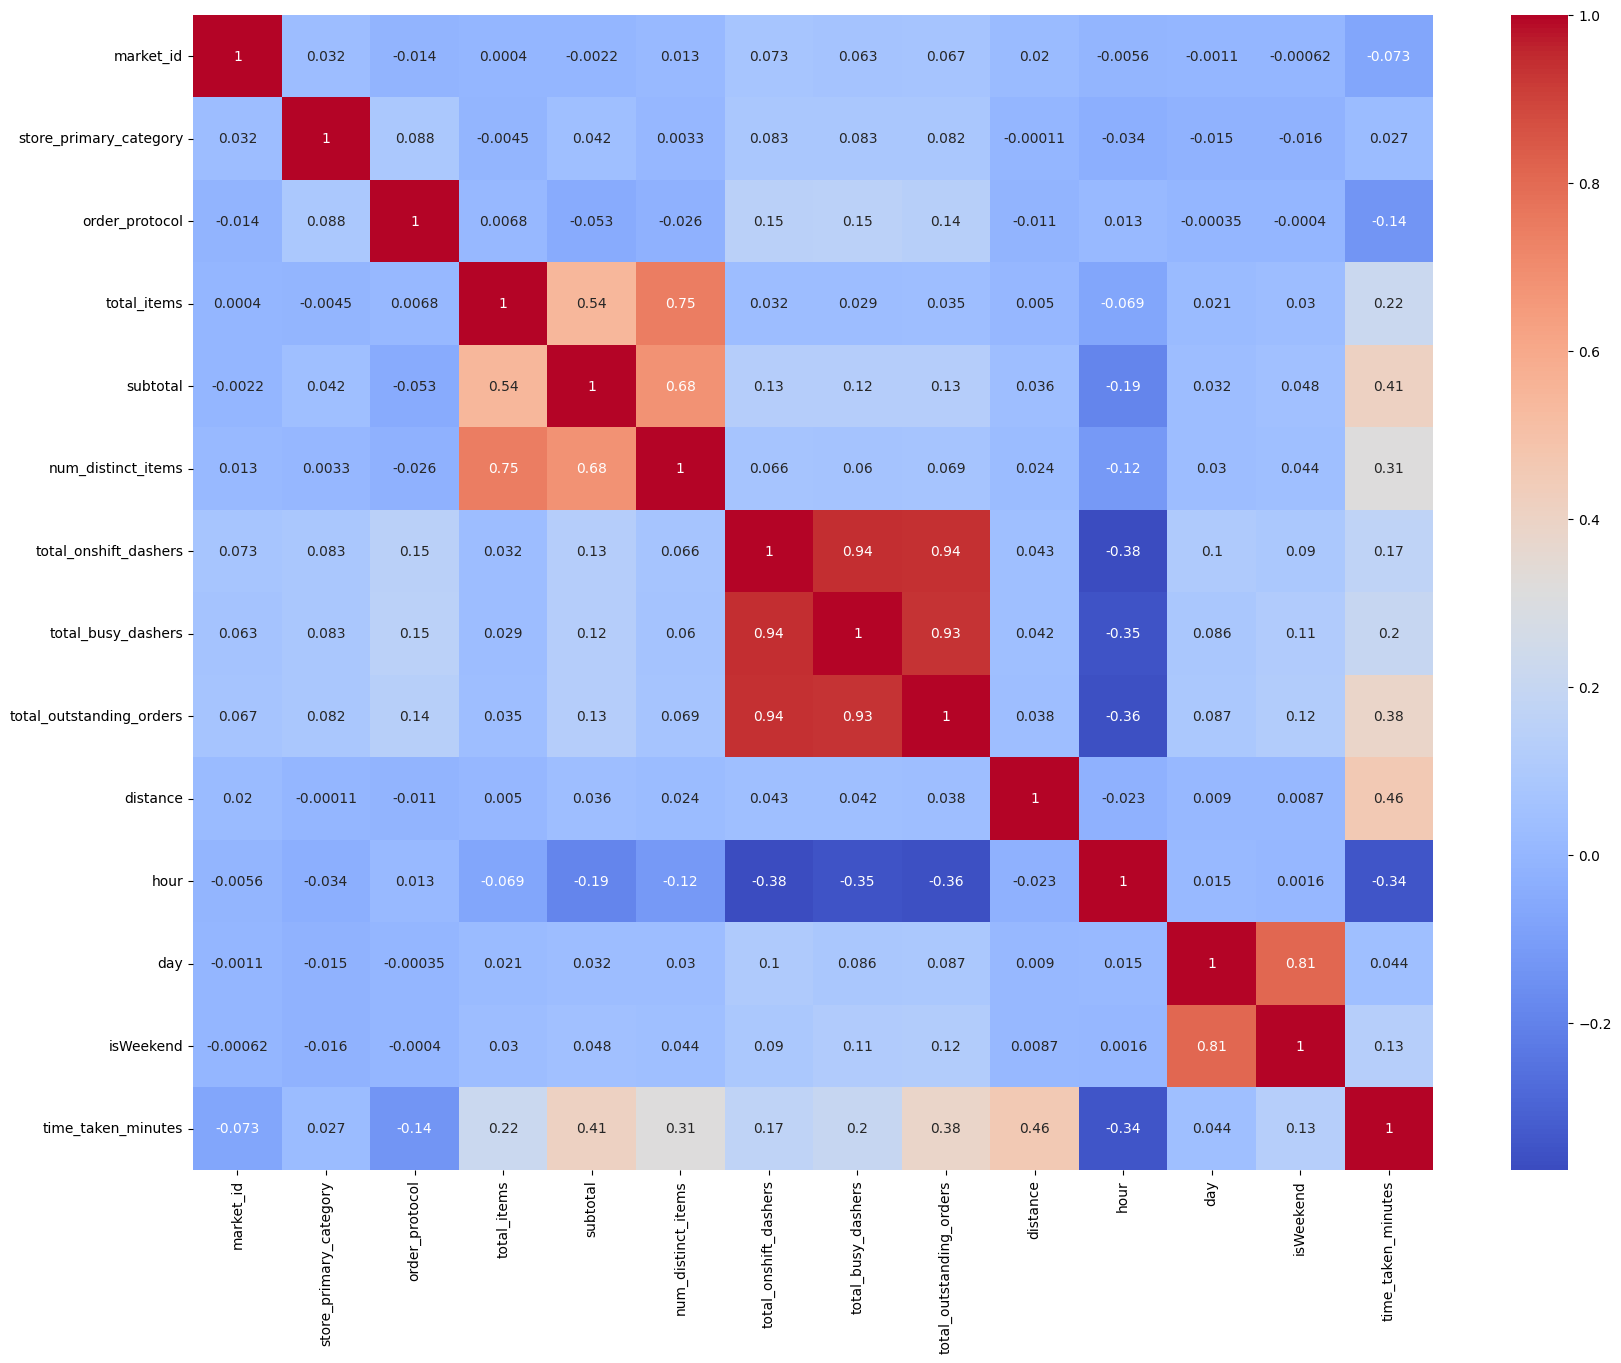

In [17]:
# Plot the heatmap of the correlation matrix
combined_df = X_train.copy()
combined_df['time_taken_minutes'] = y_train
corr = combined_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [18]:
# Drop 3-5 weakly correlated columns from training dataset
combined_df.drop(columns=['day','store_primary_category','market_id','order_protocol'], inplace=True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

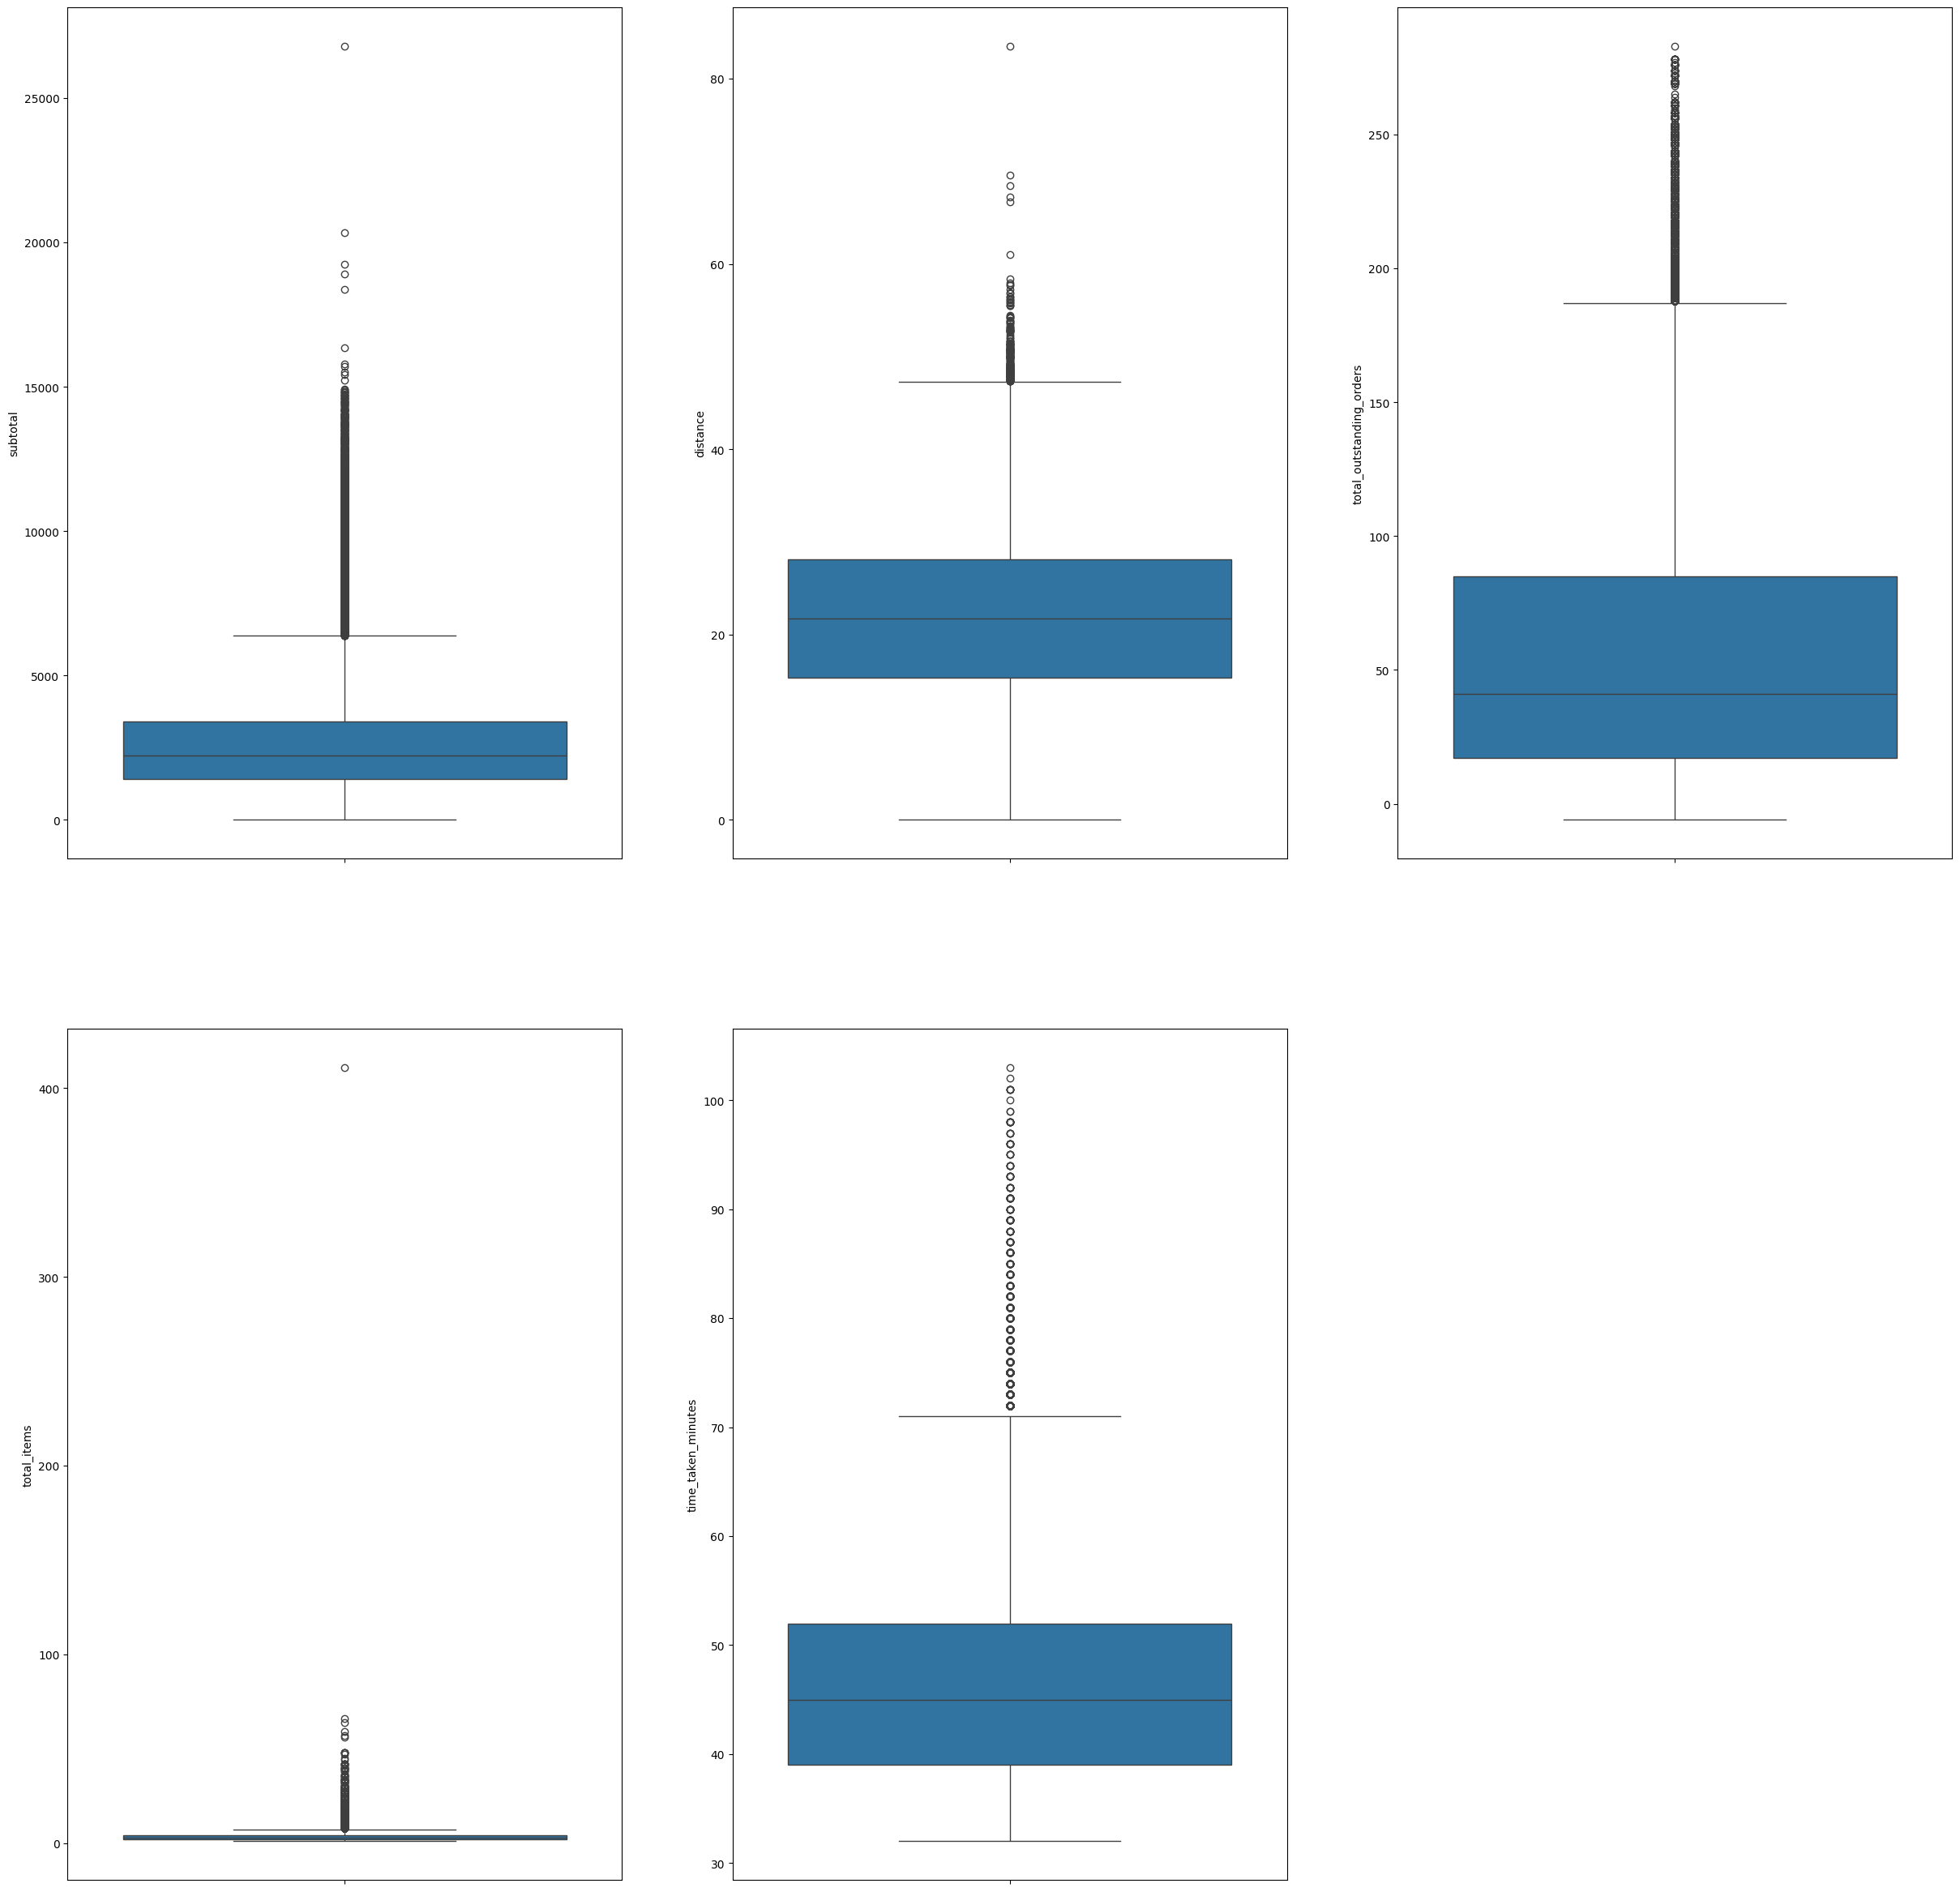

In [ ]:
# Boxplot for time_taken

plt.figure(figsize=(30, 30))

plt.subplot(2,3,1)
sns.boxplot(y = 'subtotal', data = combined_df)

plt.subplot(2,3,2)
sns.boxplot(y = 'distance', data = combined_df)

plt.subplot(2,3,3)
sns.boxplot(y = 'total_outstanding_orders', data = combined_df)

plt.subplot(2,3,4)
sns.boxplot(y = 'total_items', data = combined_df)

plt.subplot(2,3,5)
sns.boxplot(y = 'time_taken_minutes', data = combined_df)

plt.show()




##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [19]:
numerical_cols = ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance','total_items']
categorical_cols = ['store_primary_category', 'hour', 'isWeekend']

In [20]:
# Handle outliers
cutoff = combined_df['time_taken_minutes'].quantile(0.99)
combined_df = combined_df[combined_df['time_taken_minutes'] <= cutoff]

In [21]:
cutoff = combined_df['subtotal'].quantile(0.99)
combined_df = combined_df[combined_df['subtotal'] <= cutoff]

In [22]:
cutoff = combined_df['distance'].quantile(0.99)
combined_df = combined_df[combined_df['distance'] <= cutoff]

In [23]:
cutoff = combined_df['total_items'].quantile(0.99)
combined_df = combined_df[combined_df['total_items'] <= cutoff]

In [24]:
cutoff = combined_df['total_outstanding_orders'].quantile(0.99)
combined_df = combined_df[combined_df['total_outstanding_orders'] <= cutoff]

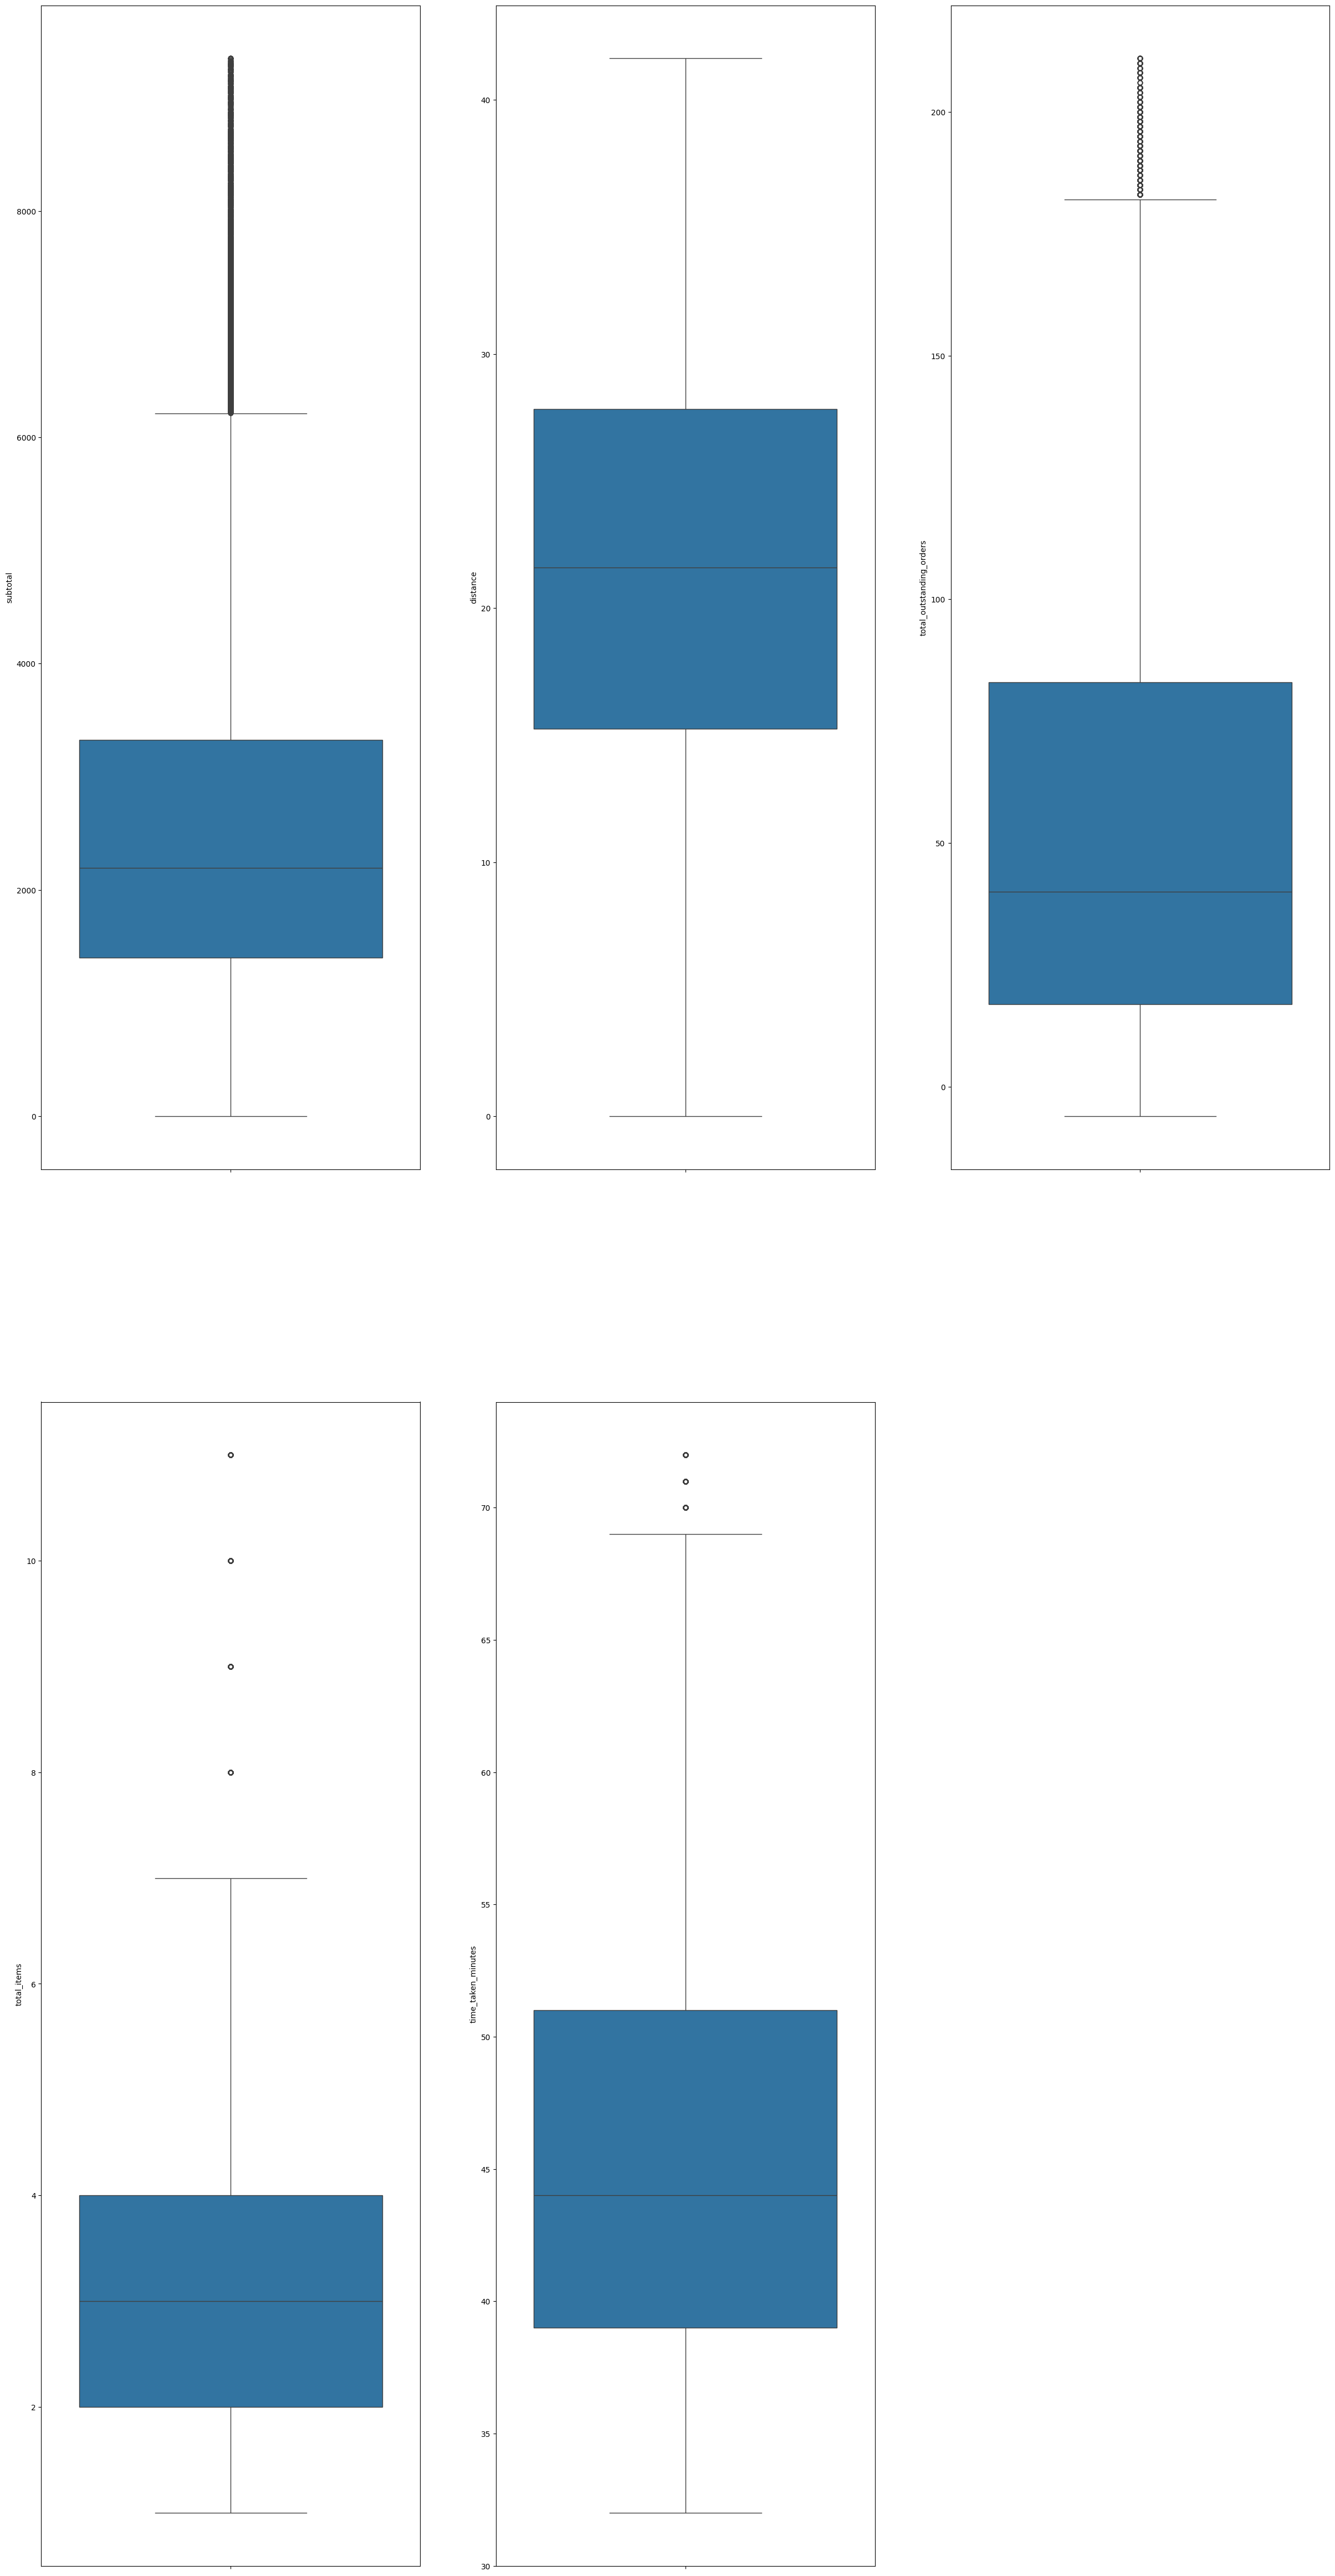

In [ ]:
# Boxplot for time_taken

plt.figure(figsize=(30, 60))

plt.subplot(2,3,1)
sns.boxplot(y = 'subtotal', data = combined_df)

plt.subplot(2,3,2)
sns.boxplot(y = 'distance', data = combined_df)

plt.subplot(2,3,3)
sns.boxplot(y = 'total_outstanding_orders', data = combined_df)

plt.subplot(2,3,4)
sns.boxplot(y = 'total_items', data = combined_df)

plt.subplot(2,3,5)
sns.boxplot(y = 'time_taken_minutes', data = combined_df)

plt.show()

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [25]:
# Define target variable (y) and features (X)
X = combined_df.drop(columns=['time_taken_minutes'])
y = combined_df['time_taken_minutes']

In [26]:
 # Split data into training and testing sets
 # since I have dropped few columns need to this again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [27]:
print(y_train.shape)
print(X_train.shape)

(107265,)
(107265, 9)


In [28]:
# Import libraries
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [29]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [30]:
X_train_scaled[numerical_cols].mean()

subtotal                   -1.122136e-16
num_distinct_items         -1.765344e-17
total_onshift_dashers       4.921766e-17
total_busy_dashers          1.516937e-17
total_outstanding_orders    5.021129e-17
distance                    1.364250e-16
total_items                 9.691176e-17
dtype: float64

In [31]:
X_train_scaled[numerical_cols].std(ddof=0)

subtotal                    1.0
num_distinct_items          1.0
total_onshift_dashers       1.0
total_busy_dashers          1.0
total_outstanding_orders    1.0
distance                    1.0
total_items                 1.0
dtype: float64

In [32]:
X_test_scaled.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
29774     -0.531265 -0.132087           -0.394791              -1.012592   
47578      0.542396  0.045464            0.287404               0.117821   
158017    -0.531265 -1.014769           -1.076987              -1.131582   
75924      0.005565  1.272469            0.287404              -0.834105   
153398     4.300208  4.129138            3.698382              -0.060665   

        total_busy_dashers  total_outstanding_orders  distance  hour  \
29774            -0.992150                 -0.971910  1.544008    23   
47578             0.225590                  0.099280 -0.538274     2   
158017           -1.120333                 -0.992121  0.299371     0   
75924            -0.896013                 -0.769799 -1.039914     2   
153398           -0.543509                 -0.587899 -1.749783    18   

        isWeekend  
29774           1  
47578           1  
158017          0  
75924           0  
153398          0

In [33]:
# reshape
y_train_lm = y_train.values.reshape(-1,1)
y_train_lm.shape

(107265, 1)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [34]:
# Create/Initialise the model
model = LinearRegression()

In [35]:
# Train the model using the training data
model.fit(X_train_scaled, y_train_lm)

LinearRegression()

In [36]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [37]:
y_pred

array([[48.59330106],
       [45.35452912],
       [46.88286812],
       ...,
       [42.42334915],
       [44.10857556],
       [49.58375792]])

In [38]:
y_train.head()

172187    60.0
168147    39.0
134080    42.0
150025    39.0
22385     47.0
Name: time_taken_minutes, dtype: float64

In [39]:
y_train_pred = model.predict(X_train_scaled)

In [40]:
# Find results for evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy_train_score = model.score(X_train_scaled, y_train)
mse = metrics.mean_absolute_error(y_train,y_train_pred)

In [41]:
print('Accuracy on training set', accuracy_train_score)
print('Mean Absolute Error:', mse)
print("Root Mean Sqaure:", rmse)
print("R2 Scored:", r2)

Accuracy on training set 0.8535828888346392
Mean Absolute Error: 2.4154296420278687
Root Mean Sqaure: 3.2731388380733457
R2 Scored: 0.8561227329677117


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [79]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE

lm = LinearRegression()

results = []

total_feats = X_train_scaled.shape[1]
for k in range(1, total_feats + 1):

    selector = RFE(lm, n_features_to_select=k, step=1)
    selector = selector.fit(X_train_scaled, y_train)

    X_train_k = selector.transform(X_train_scaled)
    X_test_k  = selector.transform(X_test_scaled)

    lm.fit(X_train_k, y_train)
    y_pred = lm.predict(X_test_k)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2     = lm.score(X_test_k, y_test)

    results.append({
        'n_features': k,
        'selected_features': list(pd.Series(X_train_scaled.columns)[selector.support_]),
        'rmse': rmse,
        'r2': r2
    })

rfe_df = pd.DataFrame(results)
print(rfe_df.sort_values('r2', ascending=False).head())

   n_features                                  selected_features      rmse  \
8           9  [total_items, subtotal, num_distinct_items, to...  3.273139   
7           8  [total_items, subtotal, num_distinct_items, to...  3.835396   
6           7  [subtotal, num_distinct_items, total_onshift_d...  3.846285   
5           6  [subtotal, total_onshift_dashers, total_busy_d...  3.863044   
4           5  [subtotal, total_onshift_dashers, total_busy_d...  3.908242   

         r2  
8  0.856123  
7  0.802447  
6  0.801324  
5  0.799589  
4  0.794871  


In [80]:
results

[{'n_features': 1,
  'selected_features': ['total_outstanding_orders'],
  'rmse': np.float64(8.068306878521243),
  'r2': 0.12576509640039468},
 {'n_features': 2,
  'selected_features': ['total_onshift_dashers', 'total_outstanding_orders'],
  'rmse': np.float64(6.528596497939711),
  'r2': 0.4275955775609239},
 {'n_features': 3,
  'selected_features': ['total_onshift_dashers',
   'total_busy_dashers',
   'total_outstanding_orders'],
  'rmse': np.float64(6.381011490080251),
  'r2': 0.4531825335738524},
 {'n_features': 4,
  'selected_features': ['total_onshift_dashers',
   'total_busy_dashers',
   'total_outstanding_orders',
   'distance'],
  'rmse': np.float64(4.949167793648005),
  'r2': 0.6710516735000523},
 {'n_features': 5,
  'selected_features': ['subtotal',
   'total_onshift_dashers',
   'total_busy_dashers',
   'total_outstanding_orders',
   'distance'],
  'rmse': np.float64(3.9082423244703226),
  'r2': 0.794871363943807},
 {'n_features': 6,
  'selected_features': ['subtotal',
   't

In [82]:
# Build the final model with selected number of features

chosen_features = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance',
    'hour',
    'isWeekend'
]


X_train_final = X_train_scaled[chosen_features]
X_test_final  = X_test_scaled[chosen_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

y_pred_final = final_model.predict(X_test_final)

from sklearn.metrics import mean_squared_error, r2_score
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
r2_final   = r2_score(y_test, y_pred_final)

print(f"Final model using {len(chosen_features)} features")
print(f" RMSE: {rmse_final:.2f} minutes")
print(f" R2  : {r2_final:.3f}")

coef_df_final = pd.DataFrame({
    'feature': chosen_features,
    'coefficient': final_model.coef_
})
print(coef_df_final.sort_values('coefficient', key=lambda x: x.abs(), ascending=False))


Final model using 9 features
 RMSE: 3.27 minutes
 R2  : 0.856
                    feature  coefficient
5  total_outstanding_orders    17.015610
3     total_onshift_dashers   -11.991810
4        total_busy_dashers    -4.486372
6                  distance     3.950130
1                  subtotal     2.419587
8                 isWeekend     1.485670
2        num_distinct_items     0.824494
0               total_items    -0.416307
7                      hour    -0.249209


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

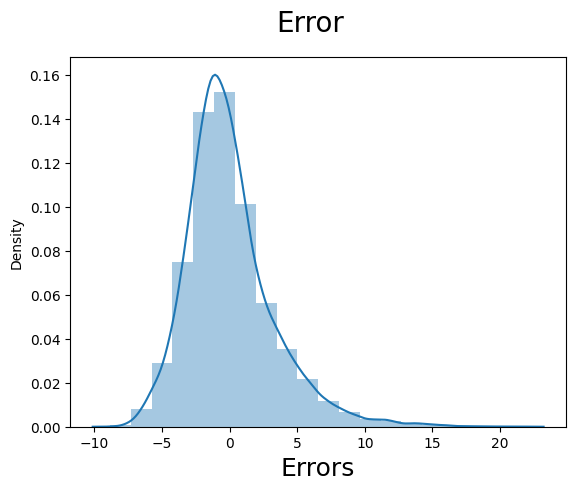

In [43]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_pred_1 = np.ravel(y_pred)

residuals = y_test - y_pred_1


fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Error', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


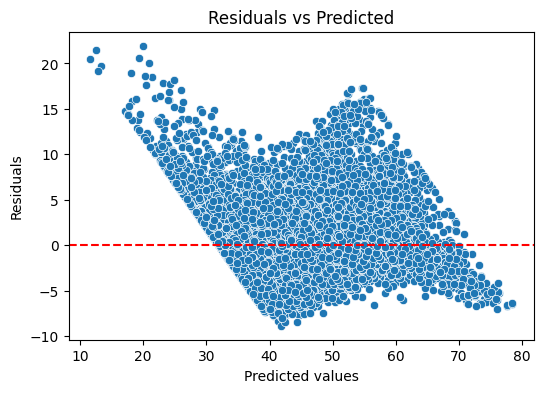

In [ ]:
# residuals vs predicted value

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_1, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

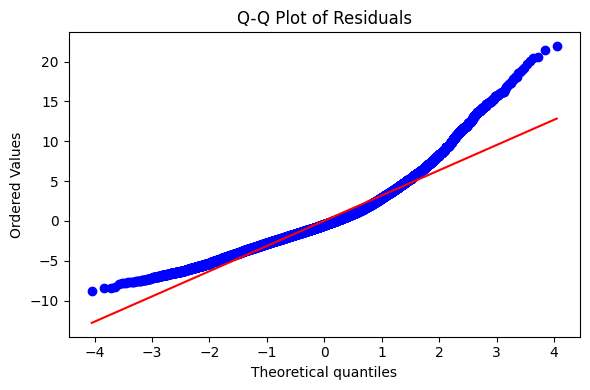

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [44]:
# Compare the scaled vs unscaled features used in the final model


scaled_coef = model.coef_
scaled_features = X_train_scaled.columns.to_list()

num_std_map = dict(zip(numerical_cols, scaler.scale_))

unscaled = []
for feat, coef in zip(scaled_features, scaled_coef):
    if feat in num_std_map:
        unscaled.append(coef / num_std_map[feat])
    else:
        unscaled.append(coef)

unscaled = unscaled[0]

scaled_coef1 = np.array(scaled_coef)

coef_df = pd.DataFrame({
    'feature'       : scaled_features,
    'coef_scaled'   : scaled_coef1[0],
    'coef_unscaled' : unscaled
})

coef_df['abs_unscaled'] = coef_df['coef_unscaled'].abs()
coef_df = coef_df.sort_values('abs_unscaled', ascending=False).drop(columns='abs_unscaled')



coef_df




feature  coef_scaled  coef_unscaled
5  total_outstanding_orders    17.015610       9.134496
3     total_onshift_dashers   -11.991810      -6.437567
4        total_busy_dashers    -4.486372      -2.408420
6                  distance     3.950130       2.120549
1                  subtotal     2.419587       1.298908
8                 isWeekend     1.485670       0.797553
2        num_distinct_items     0.824494       0.442613
0               total_items    -0.416307      -0.223486
7                      hour    -0.249209      -0.133783

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [61]:
# Analyze the effect of a unit change in a feature, say 'total_items'

feat = 'total_items'

features = X_train_scaled.columns.tolist()
idx = features.index(feat)

scaled_coef = model.coef_[idx][0]

std_total_items = scaler.scale_[numerical_cols.index(feat)]

unscaled_coef = scaled_coef / std_total_items


print(f"Feature: {feat}")
print(scaled_coef)
print(std_total_items)
print(f" • Scaled coef:   {scaled_coef:.4f}    (minutes per 1 SD ≈ {std_total_items:.2f} items)")
print(f" • Unscaled coef: {unscaled_coef:.4f}    (minutes per one extra item)")


Feature: total_items
-0.4163069483181434
1.8627858989465387
 • Scaled coef:   -0.4163    (minutes per 1 SD ≈ 1.86 items)
 • Unscaled coef: -0.2235    (minutes per one extra item)


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes we created hour and isWeekend category variable. The coef for hour is -0.249209 and isWeekend is 1.485670. This shows that the delivery time decreases in later hours in the day and delivery time increased during the weekday.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> That means 20% of the data is used for testing and remainging 80% is used for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Highest correlation is with 'distance' with 0.46. Basically it means that farther the distance increase time in delivery.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Used boxplot to find the outlier since it shows data that lay beyond interquertile line whiskers.  

- Handling outliers, capped it with 99th percentile.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>  
   - total_outstanding_orders: 17.015610
   - total_onshift_dashers: -11.991810
   - total_busy_dashers: -4.486372

In [68]:
top3 = coef_df.assign(abs_coef=coef_df['coef_scaled'].abs()) \
               .sort_values('abs_coef', ascending=False) \
               .head(3)

print(top3[['feature', 'coef_scaled']])

                    feature  coef_scaled
5  total_outstanding_orders    17.015610
3     total_onshift_dashers   -11.991810
4        total_busy_dashers    -4.486372




---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is a supervised method for predicting a continuous outcome by fitting a straight line (or hyperplane) to minimize the difference between predicted and actual values:

    Simple: y=β0+β1xy=β0​+β1​x

    Multiple: y=β0+β1x1+⋯+βnxny=β0​+β1​x1​+⋯+βn​xn​

Key assumptions

    Linearity: The mean of the target varies linearly with each feature.

    Independence: Observations (and their errors) are independent.

    Homoscedasticity: Residuals have constant variance across predictions.

    Normality: Residuals are approximately normally distributed.

    No multicollinearity: Features aren’t excessively correlated.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
Simple Linear Regression

    One predictor (xx) and one outcome (yy).

    Model form:
    y=β0+β1 x+ε
    y=β0​+β1​x+ε

    Fits a single straight line through the data.

    Easy to visualize and interpret: β1β1​ is the change in yy for a one-unit change in xx.

Multiple Linear Regression

    Two or more predictors (x1,x2,…,xnx1​,x2​,…,xn​) with one outcome (yy).

    Model form:
    y=β0+β1 x1+β2 x2+⋯+βn xn+ε
    y=β0​+β1​x1​+β2​x2​+⋯+βn​xn​+ε

    Fits a hyperplane in nn-dimensional feature space.

    Allows you to measure each feature’s partial effect on yy (holding other predictors constant).

    Can capture more complex relationships but requires careful checking of assumptions (especially multicollinearity).



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The cost function in linear regression is a single number—typically the mean squared error—that quantifies how far off your predictions are from the true values. During training, we choose the model parameters (the slopes and intercept) that make that cost as small as possible. Analytically, we can solve for those parameters in closed form using the normal equation. Alternatively, we can use gradient descent, which iteratively adjusts each parameter in the direction that most decreases the cost. In either case, minimizing the cost function yields the line (or hyperplane) that best fits the data under the least‐squares criterion.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

Underfitting occurs when your model is too simple to capture the true patterns in the data. It will perform poorly on both the training set and new (test) data. Think of drawing a straight line through data that actually follow a curved trend—you’re missing important structure.

Overfitting happens when your model is so flexible that it learns not only the underlying pattern but also the random noise in your training data. It will score very well on the training set but generalize poorly to new data. Imagine fitting a high‐degree polynomial that perfectly hits every training point but wildly oscillates between them.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Residual plots show your prediction errors scattered around zero. If the points form a random cloud, your model’s assumptions (linearity, constant variance, no big outliers) hold; any clear pattern or funnel shape tells you something’s off.